<a href="https://colab.research.google.com/github/BooEiEi/project/blob/main/newnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #นำเข้า pandas แทนที่ด้วย pd
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #นำเข้าข้อมูลจาก drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project'# ชี้ dirve ที่เราต้องการ
import missingno as mno
from sklearn import linear_model
%matplotlib inline
import matplotlib
import sklearn 
from sklearn.impute import KNNImputer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv(os.path.join(path, 'youth.csv'))
data

,No.,LabNo,Sex,AgeSYear,Enose,Overall,Body shape age,Kidney,Heart,Liver,...,071_HbA1c,CK,LD-P,AMY7,TP1,DBIL,TBIL,ALB1,GGT,homocysteine
0,1.0,NaN,2,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8,79.0,231.0,59.0,7.16,0.10,0.30,4.48,11.0,10.88
1,2.0,201807163166.00,1,49.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.11
2,3.0,201807163167,1,44.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,85.0,175.0,104.0,7.43,0.15,1.26,4.70,15.0,11.94
3,4.0,201807163168,2,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.01
4,5.0,201807163169,2,38.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,57.0,177.0,89.0,7.11,0.02,0.20,3.92,24.0,8.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,NaN,V17,2,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,NaN,V19,2,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,NaN,V20,1,28.0,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,NaN,V21,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ลบตัวแปรที่ไม่สำคัญ

In [3]:
missing = data.isna().sum()
missing

No.                                       20
LabNo                                      1
Sex                                        0
AgeSYear                                  11
Enose                                   2050
Overall                                 1878
Body shape age                          2148
Kidney                                  2261
Heart                                   2047
Liver                                   2257
Pancreas                                2199
biological age from telomere length     1851
telomere length (kb)                    1851
DHEAs (BRIA)                            2039
Weight                                    34
Height                                    31
BMI                                       34
Systolic                                  41
Diastolic                                 43
HeartRate                                396
SMM                                     1287
Fat Mass                                1288
% Body fat

In [4]:
data = data.dropna(subset=['telomere length (kb) '])

In [5]:
data=data.drop(['No.', 'LabNo','DHEAs (BRIA)'], axis=1)

In [6]:
data=data.drop(data.columns[2: 10], axis=1)

In [8]:
data=data.drop(data.columns[27:37], axis=1)

In [9]:
data.isna().sum()

Sex                          0
AgeSYear                     0
telomere length (kb)         0
Weight                       8
Height                       8
BMI                          8
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
dtype: int64

In [10]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,7.30,47.2,156.0,19.4,112.0,64.0,70.0,NaN,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,19.3,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,21.3,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,21.6,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2,86.0,4.55,49.0,154.0,20.7,129.0,79.0,83.0,NaN,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2,25.0,8.98,47.0,165.0,17.3,104.0,63.0,89.0,NaN,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,NaN
2269,2,31.0,8.23,72.2,168.0,25.6,123.0,89.0,69.0,NaN,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,NaN
2270,2,32.0,8.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,NaN
2272,1,29.0,8.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,NaN


# Remove outlier

In [11]:
''' Detection '''
# IQR
Q1 = np.percentile(data['telomere length (kb) '], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['telomere length (kb) '], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['telomere length (kb) '] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['telomere length (kb) '] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (423, 36)
New Shape:  (422, 36)


In [12]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,071_HbA1c,CK,LD-P,AMY7,TP1,DBIL,TBIL,ALB1,GGT,homocysteine
49,2,58.0,7.30,47.2,156.0,19.4,112.0,64.0,70.0,NaN,...,5.8,89.0,112.0,100.0,7.10,0.13,1.03,4.52,3.0,10.54
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,19.3,...,5.1,94.0,263.0,98.0,7.29,0.08,0.36,4.40,8.0,9.62
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,21.3,...,5.4,78.0,402.0,72.0,6.99,0.04,0.35,4.57,11.0,11.58
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,21.6,...,5.6,251.0,403.0,166.0,7.54,0.07,0.40,4.23,21.0,9.41
107,2,86.0,4.55,49.0,154.0,20.7,129.0,79.0,83.0,NaN,...,6.2,25.0,376.0,46.0,6.92,0.22,0.60,3.55,17.0,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2,25.0,8.98,47.0,165.0,17.3,104.0,63.0,89.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2269,2,31.0,8.23,72.2,168.0,25.6,123.0,89.0,69.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,2,32.0,8.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,1,29.0,8.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Standardize 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(data)

print(standardized_data)

#percent missing value

In [7]:
data.isna().mean().round(4)*100

Sex                         0.00
AgeSYear                    0.00
telomere length (kb)        0.00
Weight                      1.89
Height                      1.89
BMI                         1.89
Systolic                    1.89
Diastolic                   2.13
HeartRate                  12.06
SMM                        53.19
Fat Mass                   53.19
% Body fat                 53.19
waist to hip radio         53.19
abdominal circumference    53.43
visceral fat area          53.19
001_Glucose                 0.24
002_BUN                     0.00
003_Creatinine              0.00
004_Uric Acid              21.99
005_Cholesterol             0.00
006_Triglyceride            0.00
008_HDL-C                   0.00
009_LDL                     0.00
010_AST                     0.00
012_ALT                     0.24
013_Alkaline Phos           6.86
071_HbA1c                  39.48
CK                         58.87
LD-P                       58.87
AMY7                       58.87
TP1       

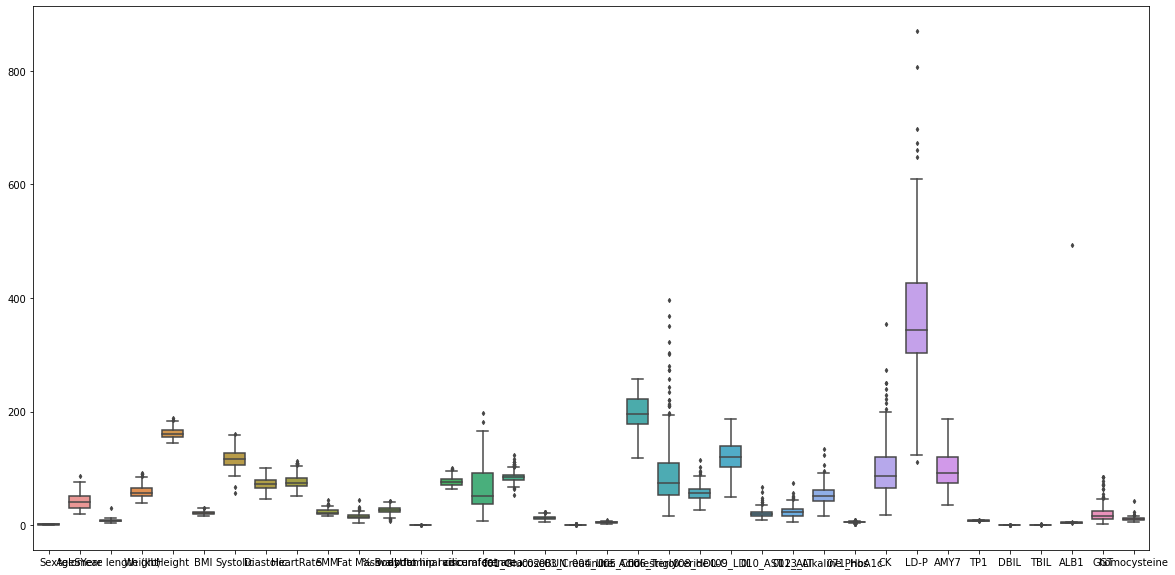

In [8]:
matplotlib.rcParams['figure.figsize'] = 20, 10
sns.boxplot(data=data, fliersize=3, width=0.7)